/tmp/ipython-input-1828065480.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-08-16  225.002838  225.779224  222.613947  222.882700  44340200
2024-08-19  224.843567  224.943110  222.006763  224.674356  40687800
2024-08-20  225.460709  226.117655  224.405621  224.724146  30299000
2024-08-21  225.351212  226.923894  224.007474  225.470666  34765500
2024-08-22  223.489868  227.282216  222.862782  226.734761  43695300


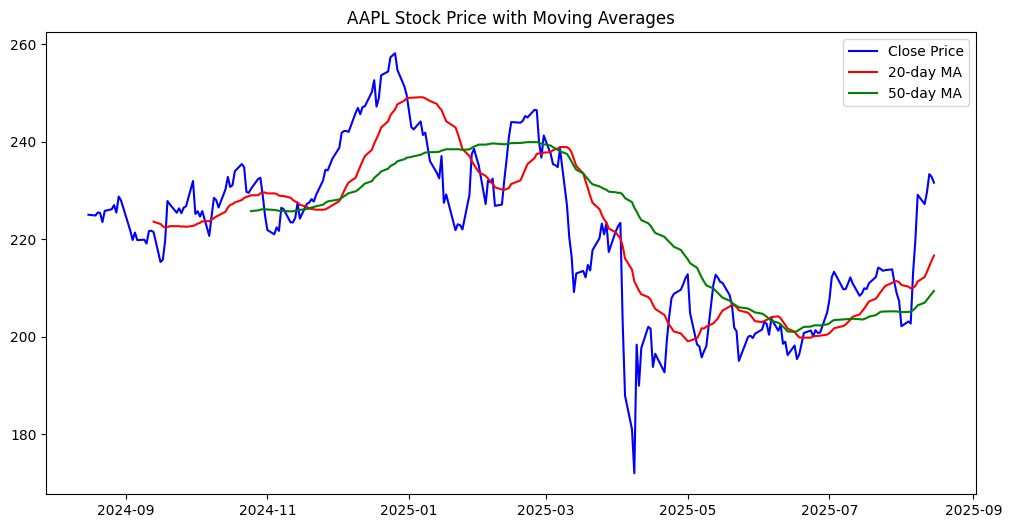

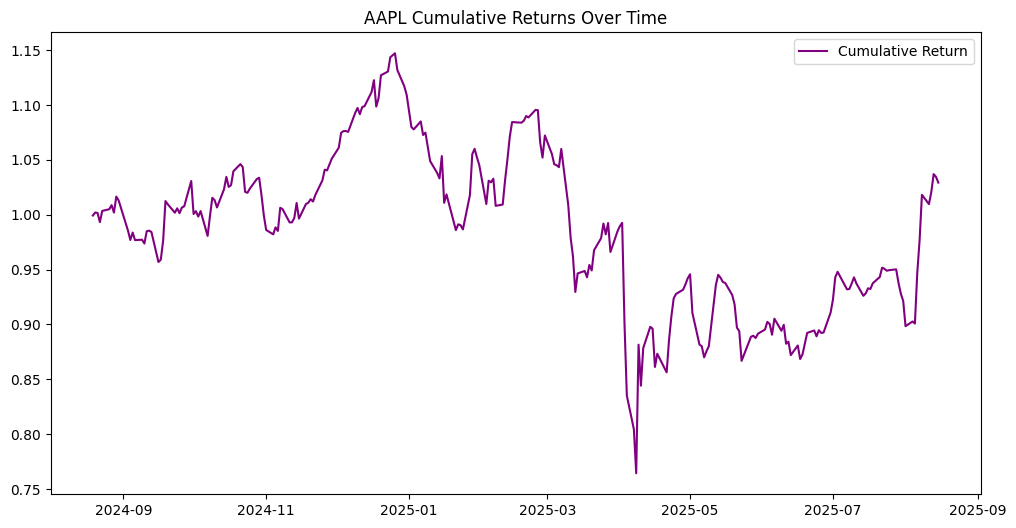

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fetch stock data (Example: Apple - AAPL for last 1 year)
ticker = "AAPL"
df = yf.download(ticker, period="1y")

# Preview data
print(df.head())

# 2. Calculate Moving Averages
df["MA20"] = df["Close"].rolling(window=20).mean()   # 20-day Moving Average
df["MA50"] = df["Close"].rolling(window=50).mean()   # 50-day Moving Average

# 3. Calculate Daily Returns
df["Daily Return"] = df["Close"].pct_change()

# 4. Calculate Cumulative Returns
df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod()

# 5. Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.plot(df.index, df["MA20"], label="20-day MA", color="red")
plt.plot(df.index, df["MA50"], label="50-day MA", color="green")
plt.legend()
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.show()

# 6. Plot Cumulative Returns
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Cumulative Return"], label="Cumulative Return", color="purple")
plt.legend()
plt.title(f"{ticker} Cumulative Returns Over Time")
plt.show()
